In [75]:
from helpers import SEABORN_COLORS, create_plot
import os
import sys
import time
import datetime

from termcolor import colored, cprint

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import sys
from os import listdir

import numpy as np
import pandas as pd  # Import Pandas and Numpy to create databases
import tensorflow as tf  # Import tensorflow to do tensor manipulations
from tensorflow import keras
from tensorflow.keras import Input, Model, layers, regularizers
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import csv
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [76]:
PATH_data = f"/mnt/d/UKB_toydata/"
PATH_GENO = f"{PATH_data}genotype"
PATH_usefull = f"{PATH_data}usefull_values_2"
PATH_usefull_accuracy = f"{PATH_usefull}/accuracy_looping2/"
os.system(f"mkdir {PATH_usefull_accuracy}")
PATH_PHENO = f"{PATH_data}phenotype"

mkdir: cannot create directory ‘/mnt/d/UKB_toydata/usefull_values_2/accuracy_looping2/’: No such file or directory


# Load data

In [77]:
#origin_sumstat = pd.read_csv(f"nathandata/cad_NIK2015_clean.txt", delimiter = "\t")
#nathan_genos = pd.read_csv(f"nathandata/cad_train_0001.txt", delimiter='\t')
#to_drop = list(nathan_genos.columns)[0:23]
#nathan_genos = nathan_genos.drop(to_drop, axis=1).fillna(0).astype(int)
#trans = nathan_genos.T
#trans['SNP'] = list(trans.index)
#trans['SNP'] = trans['SNP'].str[:-2]
#merged_df = pd.merge(origin_sumstat, trans, on='SNP', how='inner')
#merged_df.to_pickle(f"nathandata/train_sumstat.pkl")

In [78]:
train_sumstat = pd.read_pickle(f"nathandata/train_sumstat.pkl")
train_sumstat

,SNP,effect_allele,beta,markername,chr,bp_hg19,noneffect_allele,effect_allele_freq,median_info,model,...,76060,76061,76062,76063,76064,76065,76066,76067,76068,76069
0,1:2232532:A_G,G,0.053983,rs72643476,1,2232532,A,0.837474,0.885335,FIXED,...,0,1,0,1,1,0,0,0,1,0
1,1:2245570:C_G,G,-0.051921,rs2843152,1,2245570,C,0.686548,0.857960,FIXED,...,0,1,1,1,2,1,1,2,0,0
2,1:3325912:A_C,C,-0.057238,rs2493298,1,3325912,A,0.866619,0.974570,FIXED,...,0,0,0,1,1,0,0,0,0,1
3,1:14623956:C_T,C,0.087009,rs76233235,1,14623956,T,0.950816,0.974000,FIXED,...,0,0,0,0,0,0,0,0,1,0
4,1:22132518:A_G,G,0.064636,rs35465346,1,22132518,A,0.841405,0.911430,FIXED,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,22:24949714:C_G,C,0.109742,rs4820596,22,24949714,G,0.921664,0.650755,FIXED,...,0,0,0,0,0,0,0,0,0,0
510,22:24966628:A_G,A,0.116095,rs8136727,22,24966628,G,0.918980,0.727000,FIXED,...,0,0,0,0,0,0,0,0,0,1
511,22:29213054:A_T,A,-0.050266,rs133441,22,29213054,T,0.776332,0.926225,FIXED,...,0,2,0,1,1,1,0,0,0,2
512,22:30667277:C_T,C,0.048138,rs9608859,22,30667277,T,0.587949,0.948500,FIXED,...,1,0,2,1,1,2,1,0,1,2


In [79]:
train_genos = pd.read_csv(f"nathandata/cad_train_0001.txt", delimiter='\t')

In [80]:
to_drop = list(train_genos.columns)[0:23]
geno_nathan = train_genos.drop(to_drop, axis=1).fillna(0).astype(int)
geno_nathan

,1:2232532:A_G_A,1:2245570:C_G_C,1:3325912:A_C_A,1:14623956:C_T_T,1:22132518:A_G_A,1:22310674:C_T_C,1:26290480:C_G_C,1:38386727:A_G_A,1:38434086:A_G_G,1:42897895:C_T_C,...,22:19523192:G_T_T,22:24582041:A_G_G,22:24638115:A_G_G,22:24658858:G_T_T,22:24784051:A_T_T,22:24949714:C_G_G,22:24966628:A_G_G,22:29213054:A_T_T,22:30667277:C_T_T,22:31472653:C_G_C
0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1,1,0,0,1,1,0,1,0,1,2,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,1,0,0,1,1,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76065,0,1,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,1,2,0
76066,0,1,0,0,0,0,1,1,0,0,...,0,1,1,0,0,0,0,0,1,0
76067,0,2,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
76068,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [81]:
def z_score_standardization(arr):
    mean = np.mean(arr)
    std_dev = np.std(arr)
    standardized_arr = (arr - mean) / std_dev
    return standardized_arr

In [82]:
def min_max_scaling(arr):
    min_val = np.min(arr)
    max_val = np.max(arr)
    normalized_arr = (arr - min_val) / (max_val - min_val)
    return normalized_arr

In [83]:
arr = np.array(geno_nathan)@np.array(train_sumstat['beta'])
#arr = np.array(geno_nathan)@np.array(train_sumstat['beta']/train_sumstat['se_dgc'])

In [84]:
min_max_scaling(arr)

array([0.30519657, 0.52732431, 0.78254504, ..., 0.45036714, 0.60104412,
       0.57809832])

In [85]:
train_genos

,FID,IID,phenotype,beta_SUM,array01,sex,assessment_centre,age,BMI,alcohol,...,22:19523192:G_T_T,22:24582041:A_G_G,22:24638115:A_G_G,22:24658858:G_T_T,22:24784051:A_T_T,22:24949714:C_G_G,22:24966628:A_G_G,22:29213054:A_T_T,22:30667277:C_T_T,22:31472653:C_G_C
0,1217795,1217795,1,-4.29490,1,1,11018,48,31.3,6.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,3159334,3159334,1,-5.71273,1,0,11007,62,26.4,4.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2343467,2343467,1,-8.28159,1,1,11003,48,29.7,5.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
3,3655747,3655747,1,-7.43218,1,1,11012,61,21.0,1.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1089808,1089808,0,-8.64645,1,1,11008,61,24.3,6.0,...,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76065,1559270,1559270,0,-6.93854,1,0,11013,53,30.4,2.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
76066,5991479,5991479,0,-7.21846,1,0,11001,63,25.2,2.0,...,0.0,1,1.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0
76067,2086638,2086638,1,-5.31138,1,1,11004,63,29.9,2.0,...,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76068,1794933,1794933,1,-6.81832,1,1,11016,59,24.1,1.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Load nathans data

In [86]:
train_test = pd.read_csv(f"nathandata/cad_test_0001.txt", delimiter='\t')
train = pd.read_csv(f"nathandata/cad_train_0001.txt", delimiter='\t')

In [87]:
geno = pd.concat([train_test,train], axis = 0)

In [88]:
geno

,FID,IID,phenotype,beta_SUM,array01,sex,assessment_centre,age,BMI,alcohol,...,22:19523192:G_T_T,22:24582041:A_G_G,22:24638115:A_G_G,22:24658858:G_T_T,22:24784051:A_T_T,22:24949714:C_G_G,22:24966628:A_G_G,22:29213054:A_T_T,22:30667277:C_T_T,22:31472653:C_G_C
0,1375907,1375907,1,-6.14417,1,1,11012,68,26.0,-3.0,...,0.0,1,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1035939,1035939,0,-5.60813,1,1,11018,49,29.0,2.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5906034,5906034,1,-4.63673,0,0,11008,62,28.7,4.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1444833,1444833,1,-6.19119,1,1,11014,66,21.5,1.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3637563,3637563,0,-5.74162,1,0,11016,49,35.5,6.0,...,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76065,1559270,1559270,0,-6.93854,1,0,11013,53,30.4,2.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
76066,5991479,5991479,0,-7.21846,1,0,11001,63,25.2,2.0,...,0.0,1,1.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0
76067,2086638,2086638,1,-5.31138,1,1,11004,63,29.9,2.0,...,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76068,1794933,1794933,1,-6.81832,1,1,11016,59,24.1,1.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [89]:
to_drop = list(geno.columns)[0:23]
geno_input = (geno.drop(to_drop, axis=1).fillna(0).astype(int) -1)*-1
pheno_input = geno[['phenotype']]

In [90]:
geno_input

,1:2232532:A_G_A,1:2245570:C_G_C,1:3325912:A_C_A,1:14623956:C_T_T,1:22132518:A_G_A,1:22310674:C_T_C,1:26290480:C_G_C,1:38386727:A_G_A,1:38434086:A_G_G,1:42897895:C_T_C,...,22:19523192:G_T_T,22:24582041:A_G_G,22:24638115:A_G_G,22:24658858:G_T_T,22:24784051:A_T_T,22:24949714:C_G_G,22:24966628:A_G_G,22:29213054:A_T_T,22:30667277:C_T_T,22:31472653:C_G_C
0,1,0,1,1,1,1,1,0,1,0,...,1,0,-1,1,1,1,1,0,0,1
1,1,1,1,1,1,0,1,-1,1,0,...,1,1,1,1,1,1,1,1,1,1
2,1,0,1,1,0,1,0,-1,1,-1,...,1,1,1,1,1,1,1,1,0,1
3,1,1,0,1,1,1,1,0,1,-1,...,1,1,1,1,1,1,1,1,0,1
4,1,1,1,1,0,1,-1,0,0,0,...,1,1,0,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76065,1,0,1,1,1,1,1,1,1,-1,...,1,1,1,1,1,1,1,0,-1,1
76066,1,0,1,1,1,1,0,0,1,1,...,1,0,0,1,1,1,1,1,0,1
76067,1,-1,1,1,1,1,1,0,1,1,...,0,1,0,1,1,1,1,1,1,1
76068,0,1,1,0,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,0,1


# Create model

In [91]:
bottle = 15

In [92]:
size_layer_1 = int(round(input_shape_geno[1] + bottle)/2)

# Define your regularization strength (lambda)
l2_lambda = 0.001  # Adjust this value as needed

# Create layers

# Create layers
encoder_init_1 = layers.Dense(size_layer_1, 
                       activation="elu", 
                       name="encoder_init_1",
                       kernel_regularizer=regularizers.l2(l2_lambda))

encoder_init_2 = layers.Dense(bottle, 
                       activation="linear", 
                       name="encoder_init_2",
                       kernel_regularizer=regularizers.l2(l2_lambda))

decoder_init_1 = layers.Dense(size_layer_1, 
                       activation="elu", 
                       name="decoder_init_1",
                       kernel_regularizer=regularizers.l2(l2_lambda))

decoder_init_2 = layers.Dense(input_shape_geno[1], 
                       activation="linear", 
                       name="decoder_init_2",
                       kernel_regularizer=regularizers.l2(l2_lambda))


encoder_concat_1 = layers.Dense(size_layer_1, 
                       activation="elu", 
                       name="encoder_concat_1",
                       kernel_regularizer=regularizers.l2(l2_lambda))

encoder_concat_2 = layers.Dense(input_shape_pheno[1], 
                       activation="sigmoid", 
                       name="encoder_concat_2",
                       kernel_regularizer=regularizers.l2(l2_lambda))

decoder_concat_1 = layers.Dense(size_layer_1, 
                       activation="linear", 
                       name="decoder_concat_1",
                       kernel_regularizer=regularizers.l2(l2_lambda))

decoder_concat_2 = layers.Dense(input_shape_geno[1] + bottle, 
                       activation="linear", 
                       name="decoder_concat_2",
                       kernel_regularizer=regularizers.l2(l2_lambda))

bottle_neck = encoder_init_2(encoder_init_1(input_layer_geno))
concatenated_bottle = tf.concat([bottle_neck, input_layer_pheno], axis=1)
concatenated_inputs = tf.concat([bottle_neck, input_layer_geno], axis=1)

shape_zeros = concatenated_inputs.shape
dec_init_1 = decoder_init_1(concatenated_bottle)
X2 = decoder_init_2(dec_init_1)
y = encoder_concat_2(encoder_concat_1(concatenated_inputs))
conc_X2 = decoder_concat_2(decoder_concat_1(y))
squared_difference = tf.square(conc_X2 - concatenated_inputs) 
model = Model(inputs = [input_layer_geno, input_layer_pheno], outputs = [X2, y, squared_difference], name = "fishy")


In [93]:
model.summary()

Model: "fishy"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_geno (InputLayer)        [(None, 514)]        0           []                               
                                                                                                  
 encoder_init_1 (Dense)         (None, 264)          135960      ['input_geno[0][0]']             
                                                                                                  
 encoder_init_2 (Dense)         (None, 15)           3975        ['encoder_init_1[0][0]']         
                                                                                                  
 tf.concat_5 (TFOpLambda)       (None, 529)          0           ['encoder_init_2[0][0]',         
                                                                  'input_geno[0][0]']         

In [94]:
genos = geno.sample(frac=1)
pheno = genos[['phenotype']].astype(int)
genos = (genos.drop(to_drop, axis=1).fillna(0).astype(int) -1)*-1

In [95]:
genos

,1:2232532:A_G_A,1:2245570:C_G_C,1:3325912:A_C_A,1:14623956:C_T_T,1:22132518:A_G_A,1:22310674:C_T_C,1:26290480:C_G_C,1:38386727:A_G_A,1:38434086:A_G_G,1:42897895:C_T_C,...,22:19523192:G_T_T,22:24582041:A_G_G,22:24638115:A_G_G,22:24658858:G_T_T,22:24784051:A_T_T,22:24949714:C_G_G,22:24966628:A_G_G,22:29213054:A_T_T,22:30667277:C_T_T,22:31472653:C_G_C
45695,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,0,1
21923,1,1,1,1,1,1,0,-1,1,1,...,1,1,0,1,1,1,0,0,0,1
3931,0,1,0,1,1,1,1,0,0,0,...,1,0,1,1,1,1,1,1,1,1
30697,1,1,0,1,0,1,1,0,1,-1,...,1,1,1,1,1,1,1,1,0,1
25454,1,1,1,1,1,1,1,0,0,1,...,1,1,0,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35424,1,0,1,1,1,1,1,0,1,1,...,1,1,0,1,1,1,1,1,0,1
22682,1,0,1,1,1,1,0,0,1,1,...,1,1,0,1,1,1,1,1,0,1
4189,0,1,1,1,0,1,1,0,0,0,...,1,1,1,1,1,1,1,1,1,1
47118,1,1,1,1,0,1,0,1,1,0,...,1,1,-1,1,1,1,1,0,1,1


In [96]:
len_test = round(genos.shape[0]/10)*3
len_train = genos.shape[0] - len_test
X_train = genos.head(len_train)
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = genos.tail(len_test)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)

shape_train = (len_train,squared_difference.shape[1])
shape_test = (len_test,squared_difference.shape[1])

pheno_tensor_train  = tf.convert_to_tensor(pheno.head(len_train))
pheno_tensor_test = tf.convert_to_tensor(pheno.tail(len_test))

optimizer='Adam'
loss = 'mse'
zero_tensor_train = tf.zeros(shape_train, dtype=tf.float32)
zero_tensor_test = tf.zeros(shape_test, dtype=tf.float32)
model.compile(optimizer,  loss=['mse', 'binary_crossentropy', 'mse'], metrics = ["mse"])

In [97]:
epoch = 100

In [98]:
history = model.fit([X_train,pheno_tensor_train],
                    [X_train, pheno_tensor_train, zero_tensor_train],
                    validation_data=([X_test, pheno_tensor_test], 
                                     [X_test, pheno_tensor_test, zero_tensor_test]),
                    epochs = epoch,
                    verbose = 1)

Epoch 1/100
1872/1872 [==============================] - 28s 13ms/step - loss: 1.4823 - decoder_init_2_loss: 0.2974 - encoder_concat_2_loss: 0.7045 - tf.math.square_2_loss: 0.2513 - decoder_init_2_mse: 0.2974 - encoder_concat_2_mse: 0.2546 - tf.math.square_2_mse: 0.2513 - val_loss: 1.3017 - val_decoder_init_2_loss: 0.2938 - val_encoder_concat_2_loss: 0.7221 - val_tf.math.square_2_loss: 0.2454 - val_decoder_init_2_mse: 0.2938 - val_encoder_concat_2_mse: 0.2637 - val_tf.math.square_2_mse: 0.2454
Epoch 2/100
1872/1872 [==============================] - 23s 12ms/step - loss: 1.2528 - decoder_init_2_loss: 0.2933 - encoder_concat_2_loss: 0.6926 - tf.math.square_2_loss: 0.2436 - decoder_init_2_mse: 0.2933 - encoder_concat_2_mse: 0.2497 - tf.math.square_2_mse: 0.2436 - val_loss: 1.2383 - val_decoder_init_2_loss: 0.2933 - val_encoder_concat_2_loss: 0.6881 - val_tf.math.square_2_loss: 0.2430 - val_decoder_init_2_mse: 0.2933 - val_encoder_concat_2_mse: 0.2475 - val_tf.math.square_2_mse: 0.2430
Ep

1872/1872 [==============================] - 23s 12ms/step - loss: 1.2223 - decoder_init_2_loss: 0.2927 - encoder_concat_2_loss: 0.6838 - tf.math.square_2_loss: 0.2414 - decoder_init_2_mse: 0.2927 - encoder_concat_2_mse: 0.2454 - tf.math.square_2_mse: 0.2414 - val_loss: 1.2355 - val_decoder_init_2_loss: 0.2929 - val_encoder_concat_2_loss: 0.6946 - val_tf.math.square_2_loss: 0.2418 - val_decoder_init_2_mse: 0.2929 - val_encoder_concat_2_mse: 0.2507 - val_tf.math.square_2_mse: 0.2418
Epoch 18/100
1872/1872 [==============================] - 23s 12ms/step - loss: 1.2231 - decoder_init_2_loss: 0.2927 - encoder_concat_2_loss: 0.6846 - tf.math.square_2_loss: 0.2414 - decoder_init_2_mse: 0.2927 - encoder_concat_2_mse: 0.2457 - tf.math.square_2_mse: 0.2414 - val_loss: 1.2248 - val_decoder_init_2_loss: 0.2929 - val_encoder_concat_2_loss: 0.6863 - val_tf.math.square_2_loss: 0.2418 - val_decoder_init_2_mse: 0.2929 - val_encoder_concat_2_mse: 0.2466 - val_tf.math.square_2_mse: 0.2418
Epoch 19/100


1872/1872 [==============================] - 23s 12ms/step - loss: 1.2216 - decoder_init_2_loss: 0.2927 - encoder_concat_2_loss: 0.6833 - tf.math.square_2_loss: 0.2414 - decoder_init_2_mse: 0.2927 - encoder_concat_2_mse: 0.2451 - tf.math.square_2_mse: 0.2414 - val_loss: 1.2324 - val_decoder_init_2_loss: 0.2929 - val_encoder_concat_2_loss: 0.6910 - val_tf.math.square_2_loss: 0.2418 - val_decoder_init_2_mse: 0.2929 - val_encoder_concat_2_mse: 0.2489 - val_tf.math.square_2_mse: 0.2418
Epoch 34/100
1872/1872 [==============================] - 23s 12ms/step - loss: 1.2218 - decoder_init_2_loss: 0.2927 - encoder_concat_2_loss: 0.6833 - tf.math.square_2_loss: 0.2415 - decoder_init_2_mse: 0.2927 - encoder_concat_2_mse: 0.2451 - tf.math.square_2_mse: 0.2415 - val_loss: 1.2335 - val_decoder_init_2_loss: 0.2929 - val_encoder_concat_2_loss: 0.6870 - val_tf.math.square_2_loss: 0.2419 - val_decoder_init_2_mse: 0.2929 - val_encoder_concat_2_mse: 0.2469 - val_tf.math.square_2_mse: 0.2419
Epoch 35/100


1872/1872 [==============================] - 22s 12ms/step - loss: 1.2214 - decoder_init_2_loss: 0.2927 - encoder_concat_2_loss: 0.6830 - tf.math.square_2_loss: 0.2414 - decoder_init_2_mse: 0.2927 - encoder_concat_2_mse: 0.2450 - tf.math.square_2_mse: 0.2414 - val_loss: 1.2249 - val_decoder_init_2_loss: 0.2929 - val_encoder_concat_2_loss: 0.6871 - val_tf.math.square_2_loss: 0.2417 - val_decoder_init_2_mse: 0.2929 - val_encoder_concat_2_mse: 0.2470 - val_tf.math.square_2_mse: 0.2417
Epoch 50/100
1872/1872 [==============================] - 23s 12ms/step - loss: 1.2213 - decoder_init_2_loss: 0.2927 - encoder_concat_2_loss: 0.6829 - tf.math.square_2_loss: 0.2415 - decoder_init_2_mse: 0.2927 - encoder_concat_2_mse: 0.2449 - tf.math.square_2_mse: 0.2415 - val_loss: 1.2246 - val_decoder_init_2_loss: 0.2929 - val_encoder_concat_2_loss: 0.6866 - val_tf.math.square_2_loss: 0.2418 - val_decoder_init_2_mse: 0.2929 - val_encoder_concat_2_mse: 0.2468 - val_tf.math.square_2_mse: 0.2418
Epoch 51/100


1872/1872 [==============================] - 23s 12ms/step - loss: 1.2224 - decoder_init_2_loss: 0.2927 - encoder_concat_2_loss: 0.6835 - tf.math.square_2_loss: 0.2415 - decoder_init_2_mse: 0.2927 - encoder_concat_2_mse: 0.2452 - tf.math.square_2_mse: 0.2415 - val_loss: 1.2282 - val_decoder_init_2_loss: 0.2929 - val_encoder_concat_2_loss: 0.6872 - val_tf.math.square_2_loss: 0.2418 - val_decoder_init_2_mse: 0.2929 - val_encoder_concat_2_mse: 0.2470 - val_tf.math.square_2_mse: 0.2418
Epoch 66/100
1872/1872 [==============================] - 23s 12ms/step - loss: 1.2213 - decoder_init_2_loss: 0.2927 - encoder_concat_2_loss: 0.6832 - tf.math.square_2_loss: 0.2414 - decoder_init_2_mse: 0.2927 - encoder_concat_2_mse: 0.2450 - tf.math.square_2_mse: 0.2414 - val_loss: 1.2254 - val_decoder_init_2_loss: 0.2929 - val_encoder_concat_2_loss: 0.6866 - val_tf.math.square_2_loss: 0.2418 - val_decoder_init_2_mse: 0.2929 - val_encoder_concat_2_mse: 0.2467 - val_tf.math.square_2_mse: 0.2418
Epoch 67/100


1872/1872 [==============================] - 23s 12ms/step - loss: 1.2220 - decoder_init_2_loss: 0.2927 - encoder_concat_2_loss: 0.6836 - tf.math.square_2_loss: 0.2414 - decoder_init_2_mse: 0.2927 - encoder_concat_2_mse: 0.2453 - tf.math.square_2_mse: 0.2414 - val_loss: 1.2303 - val_decoder_init_2_loss: 0.2929 - val_encoder_concat_2_loss: 0.6908 - val_tf.math.square_2_loss: 0.2418 - val_decoder_init_2_mse: 0.2929 - val_encoder_concat_2_mse: 0.2488 - val_tf.math.square_2_mse: 0.2418
Epoch 82/100
1872/1872 [==============================] - 22s 12ms/step - loss: 1.2220 - decoder_init_2_loss: 0.2927 - encoder_concat_2_loss: 0.6834 - tf.math.square_2_loss: 0.2415 - decoder_init_2_mse: 0.2927 - encoder_concat_2_mse: 0.2452 - tf.math.square_2_mse: 0.2415 - val_loss: 1.2243 - val_decoder_init_2_loss: 0.2929 - val_encoder_concat_2_loss: 0.6867 - val_tf.math.square_2_loss: 0.2418 - val_decoder_init_2_mse: 0.2929 - val_encoder_concat_2_mse: 0.2468 - val_tf.math.square_2_mse: 0.2418
Epoch 83/100


1872/1872 [==============================] - 20s 11ms/step - loss: 1.2203 - decoder_init_2_loss: 0.2927 - encoder_concat_2_loss: 0.6823 - tf.math.square_2_loss: 0.2414 - decoder_init_2_mse: 0.2927 - encoder_concat_2_mse: 0.2446 - tf.math.square_2_mse: 0.2414 - val_loss: 1.2255 - val_decoder_init_2_loss: 0.2929 - val_encoder_concat_2_loss: 0.6874 - val_tf.math.square_2_loss: 0.2418 - val_decoder_init_2_mse: 0.2929 - val_encoder_concat_2_mse: 0.2471 - val_tf.math.square_2_mse: 0.2418
Epoch 98/100
1872/1872 [==============================] - 24s 13ms/step - loss: 1.2218 - decoder_init_2_loss: 0.2927 - encoder_concat_2_loss: 0.6830 - tf.math.square_2_loss: 0.2415 - decoder_init_2_mse: 0.2927 - encoder_concat_2_mse: 0.2450 - tf.math.square_2_mse: 0.2415 - val_loss: 1.2249 - val_decoder_init_2_loss: 0.2929 - val_encoder_concat_2_loss: 0.6861 - val_tf.math.square_2_loss: 0.2418 - val_decoder_init_2_mse: 0.2929 - val_encoder_concat_2_mse: 0.2465 - val_tf.math.square_2_mse: 0.2418
Epoch 99/100


In [99]:
genos = geno.sample(frac=1)
pheno = genos[['phenotype']].astype(int)
genos = (genos.drop(to_drop, axis=1).fillna(0).astype(int) -1)*-1

X1 = tf.convert_to_tensor(genos, dtype=tf.float32)
X2 = tf.convert_to_tensor(pheno, dtype=tf.float32)
output_model = model([X1,X2])
submodel_layers1 = model.layers[:3]
submodel1 = Model(inputs=[model.input[0]], outputs=submodel_layers1[-1].output)
submodel1(X1)

submodel_layers2 = model.layers[:6]
submodel2 = Model(inputs=[model.input[0]], outputs=submodel_layers2[-1].output)
submodel2(X1)

submodel_layers3 = model.layers[:16]
submodel3 = Model(inputs=[model.input[0]], outputs=submodel_layers3[-1].output)
submodel3(X1)

cols = []
for i2 in range(np.shape(submodel1(X1))[1]):
    cols.append(f'dim{i2+1}')
bottleneck_1 = pd.DataFrame(submodel1(X1), columns = cols)
cols = []
for i2 in range(np.shape(submodel2(X1))[1]):
    cols.append(f'pheno{i2+1}')
predicted_pheno = pd.DataFrame(submodel2(X1), columns = cols)

bottleneck_1['phenotype'] = list(pheno['phenotype'])
bottleneck_1['predicted phenotype'] = list(predicted_pheno['pheno1'])

# Split the data into features (X) and labels (Y)
X = bottleneck_1[['predicted phenotype']]
Y = bottleneck_1['phenotype']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Instantiate the model
model_log = LogisticRegression()

# Fit the model to the training data
model_log.fit(X_train, Y_train)
y_pred = model_log.predict(X_test)

accuracy_sc = accuracy_score(Y_test, y_pred)

test_accuracy = np.round(accuracy_sc,3)
#bottleneck_1.to_pickle(f"{PATH_usefull_accuracy}/{disease}_dims_{bottle}_test_accuracy_{test_accuracy}.pkl")



<module 'matplotlib.pyplot' from '/home/mat2m10/.pyenv/versions/3.10.6/envs/ctg/lib/python3.10/site-packages/matplotlib/pyplot.py'>

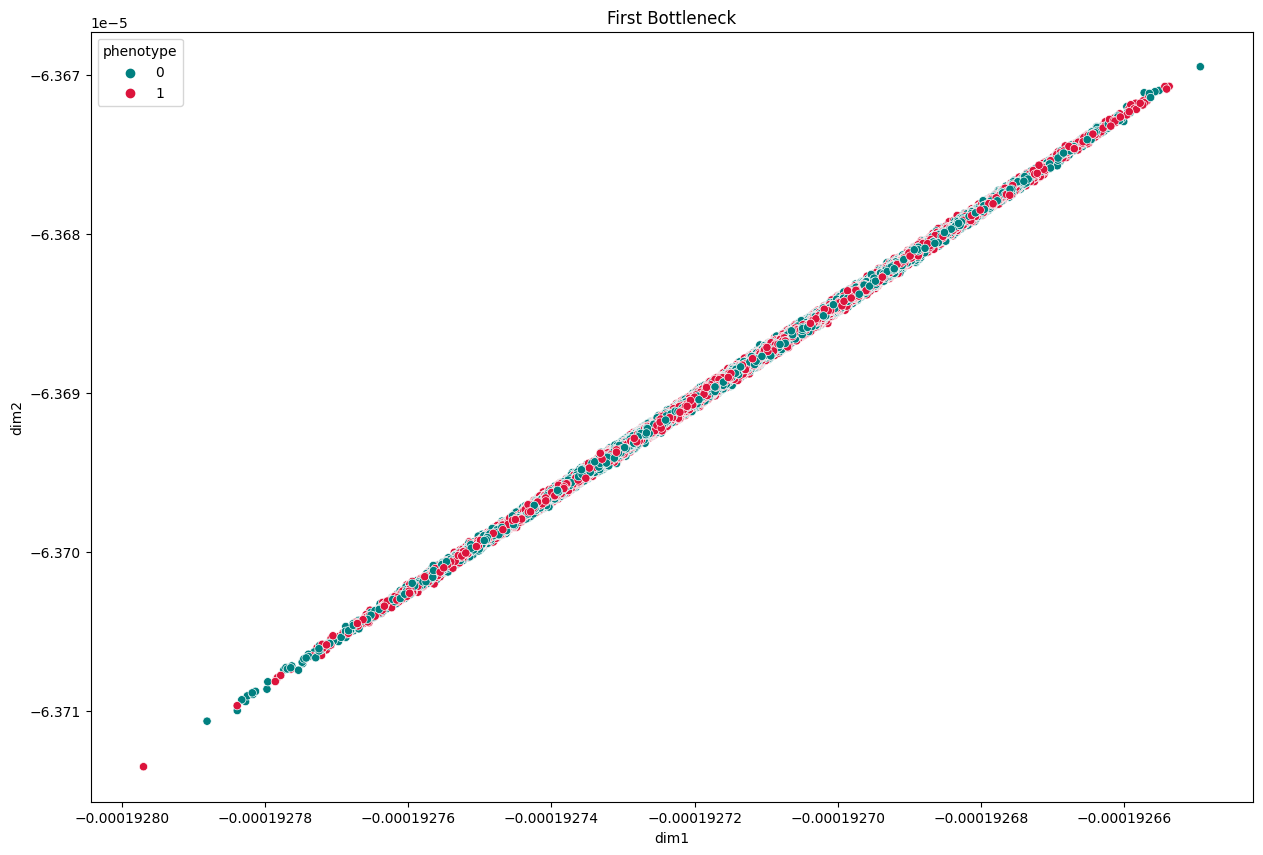

In [100]:
create_plot(bottleneck_1['phenotype'], bottleneck_1, 'dim1', 'dim2', 'First Bottleneck')

In [101]:
accuracy_sc

0.5722715587754148

# Validation

In [102]:
validation = pd.read_csv(f"nathandata/cad_tune_0001.txt", delimiter='\t')

In [103]:
geno = pd.concat([validation], axis = 0)

In [104]:
genos = geno.sample(frac=1)
pheno = genos[['phenotype']].astype(int)
genos = (genos.drop(to_drop, axis=1).fillna(0).astype(int) -1)*-1

In [105]:
X1 = tf.convert_to_tensor(genos, dtype=tf.float32)
X2 = tf.convert_to_tensor(pheno, dtype=tf.float32)
output_model = model([X1,X2])
submodel_layers1 = model.layers[:3]
submodel1 = Model(inputs=[model.input[0]], outputs=submodel_layers1[-1].output)
submodel_layers2 = model.layers[:6]
submodel2 = Model(inputs=[model.input[0]], outputs=submodel_layers2[-1].output)

cols = []
for i2 in range(np.shape(submodel1(X1))[1]):
    cols.append(f'dim{i2+1}')
bottleneck_1 = pd.DataFrame(submodel1(X1), columns = cols)
cols = []
for i2 in range(np.shape(submodel2(X1))[1]):
    cols.append(f'pheno{i2+1}')
predicted_pheno = pd.DataFrame(submodel2(X1), columns = cols)

bottleneck_1['phenotype'] = list(pheno['phenotype'])
bottleneck_1['predicted phenotype'] = list(predicted_pheno['pheno1'])

# Split the data into features (X) and labels (Y)
X = bottleneck_1[['predicted phenotype']]
Y = bottleneck_1['phenotype']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Instantiate the model
#model_log = LogisticRegression()

# Fit the model to the training data
#model_log.fit(X_train, Y_train)
y_pred = model_log.predict(X_test)

accuracy_sc = accuracy_score(Y_test, y_pred)

test_accuracy = np.round(accuracy_sc,3)

In [106]:
test_accuracy

0.568

In [107]:
vals = model.history.history
vali = list(vals.keys())
loss = vals[vali[0]]
decoder_loss = vals[vali[1]]
encoder_loss = vals[vali[2]]
decoder_accuracy = vals[vali[3]]
decoder_mse = vals[vali[4]]
encoder_accuracy = vals[vali[5]]
encoder_mse = vals[vali[6]]

val_loss = vals[vali[7]]
val_decoder_loss = vals[vali[8]]
val_encoder_loss = vals[vali[9]]
val_decoder_accuracy = vals[vali[10]]
val_decoder_mse = vals[vali[11]]
val_encoder_accuracy = vals[vali[12]]
val_encoder_mse = vals[vali[13]]

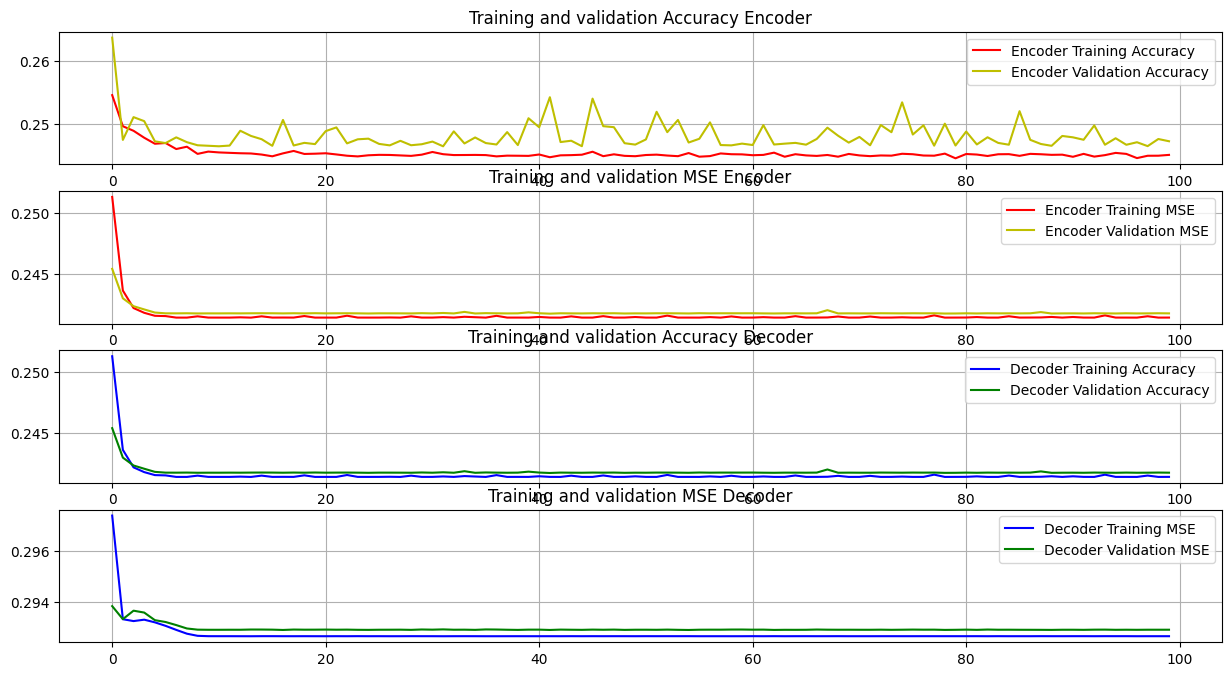

In [108]:
epochsticks = range(len(val_loss))
plt.figure(figsize = (15, 10))
ax1 = plt.subplot(511)
ax1.plot(epochsticks, encoder_accuracy, 'r', label = 'Encoder Training Accuracy')
ax1.plot(epochsticks, val_encoder_accuracy, 'y', label = 'Encoder Validation Accuracy')
ax1.set_title('Training and validation Accuracy Encoder')
ax1.grid()
ax1.legend()

ax2 = plt.subplot(512, sharex = ax1)
ax2.plot(epochsticks, encoder_mse, 'r', label = 'Encoder Training MSE')
ax2.plot(epochsticks, val_encoder_mse, 'y', label = 'Encoder Validation MSE')
ax2.set_title('Training and validation MSE Encoder')
ax2.grid()
ax2.legend()

ax3 = plt.subplot(513, sharex = ax1)
ax3.plot(epochsticks, decoder_accuracy, 'b', label = 'Decoder Training Accuracy')
ax3.plot(epochsticks, val_decoder_accuracy, 'g', label = 'Decoder Validation Accuracy')
ax3.set_title('Training and validation Accuracy Decoder')
ax3.grid()
ax3.legend()

ax4 = plt.subplot(514, sharex = ax1)

ax4.plot(epochsticks, decoder_mse, 'b', label = 'Decoder Training MSE')
ax4.plot(epochsticks, val_decoder_mse, 'g', label = 'Decoder Validation MSE')
ax4.set_title('Training and validation MSE Decoder')
ax4.grid()
ax4.legend()

<module 'matplotlib.pyplot' from '/home/mat2m10/.pyenv/versions/3.10.6/envs/ctg/lib/python3.10/site-packages/matplotlib/pyplot.py'>

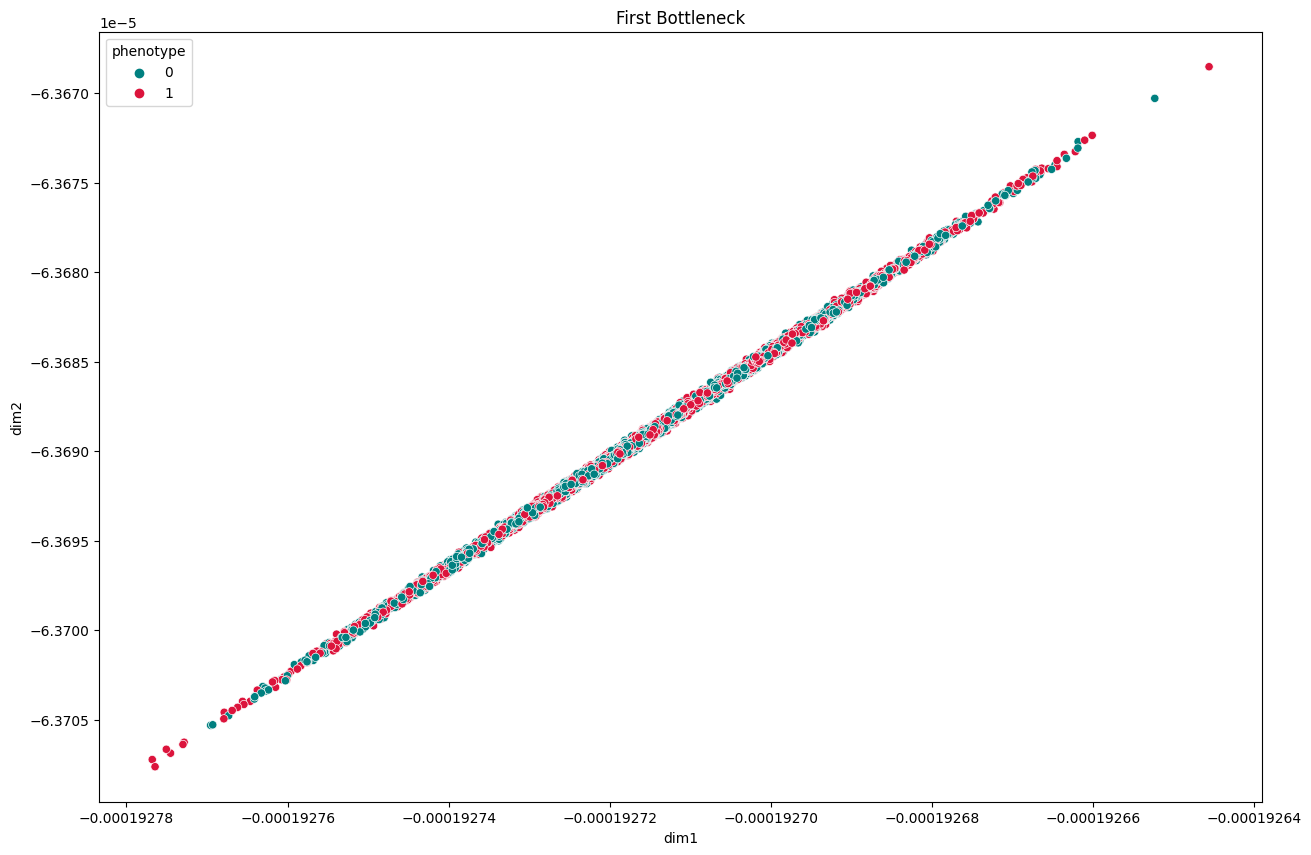

In [109]:
create_plot(bottleneck_1['phenotype'], bottleneck_1, 'dim1', 'dim2', 'First Bottleneck')

# Baseline

In [110]:
geno

,FID,IID,phenotype,beta_SUM,array01,sex,assessment_centre,age,BMI,alcohol,...,22:19523192:G_T_T,22:24582041:A_G_G,22:24638115:A_G_G,22:24658858:G_T_T,22:24784051:A_T_T,22:24949714:C_G_G,22:24966628:A_G_G,22:29213054:A_T_T,22:30667277:C_T_T,22:31472653:C_G_C
0,3002525,3002525,0,-5.12092,1,1,11016,69,27.6,5.0,...,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1464264,1464264,1,-5.38840,1,1,11018,55,32.0,6.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5942595,5942595,1,-6.37703,1,1,11013,61,32.4,3.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
3,5335429,5335429,0,-6.99271,1,0,11010,66,34.3,3.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4057986,4057986,0,-7.02816,1,0,11020,48,23.3,2.0,...,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9503,2707883,2707883,0,-6.24845,1,1,11014,66,31.4,3.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9504,2859243,2859243,0,-7.08797,1,1,11002,44,26.9,4.0,...,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
9505,3417660,3417660,0,-6.24955,0,0,11006,52,28.2,3.0,...,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
9506,2453652,2453652,0,-7.05169,1,1,11021,54,32.3,3.0,...,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [111]:
X = geno[['beta_SUM']]
Y = geno['phenotype']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Instantiate the model
model_log = LogisticRegression()

# Fit the model to the training data
model_log.fit(X_train, Y_train)
y_pred = model_log.predict(X_test)

accuracy_sc = accuracy_score(Y_test, y_pred)

test_accuracy = np.round(accuracy_sc,3)

In [112]:
test_accuracy

0.546

# Understand